In [65]:
import seaborn as sns

In [13]:
import numpy as np
import pandas as pd
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt

In [31]:
city_list_df = pd.read_csv("City Code Reference.csv")

In [79]:
city_list = city_list_df['City Code']
city_list_final = []
for city in city_list.tolist():
    if (city == 'KHOU'):
        continue
    city_list_final.append(city.split("\n")[0])     

city_list_final = ['KSEA','KSFO','KBUR','KSAN','KBOS','KLGA','KDCA']

In [80]:
print(city_list_final)

['KSEA', 'KSFO', 'KBUR', 'KSAN', 'KBOS', 'KLGA', 'KDCA']


In [121]:
# city = 'KSAN'
# year = 2018
# fname = 'pics/{}/temperature/y{}_plot.jpg'.format(city,year)

average_temp_dict = {}

for city in city_list_final:
    start_year = 1990
    end_year = 2018
    yearly_avg_temp_list = []
    for year in range(start_year, end_year + 1):
        year_start, year_end = get_yearly_start_end(year=year)
        weather_info = get_info(city,year_start, year_end, info_type='temperature', output=False)
        yearly_avg_temp_list.append(weather_info['mean'])
    se = pd.Series(yearly_avg_temp_list)
    average_temp_dict[city] = se.values
average_temp_df = pd.DataFrame(average_temp_dict) 
average_temp_df.rename(columns={'KSEA':'Seattle',
                          'KSFO':'SF',
                          'KBUR':'LA', 'KSAN':'SD', 'KBOS':'Boston', 'KDCA':'DC', 'KLGA':'NY' },
                                            
                 inplace=True)

In [122]:
print(average_temp_df)

      Seattle         SF         LA         SD     Boston         NY  \
0   52.252055  57.632877  65.263014  63.887671  53.131507  57.468493   
1   52.684932  57.273973  64.273973  62.509589  53.380822  57.797260   
2   54.215847  59.357923  65.855191  65.286885  49.948087  54.240437   
3   52.120548  58.841096  64.693151  63.835616  51.564384  55.339726   
4   53.372603  56.695890  64.249315  63.134247  52.068493  55.641096   
5   54.334247  57.917808  65.273973  63.616438  51.427397  55.975342   
6   51.650273  58.306011  65.532787  63.986339  50.683060  54.401639   
7   52.383562  59.241096  66.490411  64.890411  50.756164  55.068493   
8   52.780822  56.958904  63.350685  62.641096  52.846575  57.600000   
9   51.131507  56.183562  63.378082  61.835616  52.572603  56.610959   
10  50.797814  57.464481  64.592896  63.016393  50.128415  54.150273   
11  51.005479  57.400000  63.723288  61.969863  52.378082  56.764384   
12  51.331507  57.665753  63.638356  61.808219  52.687671  56.71

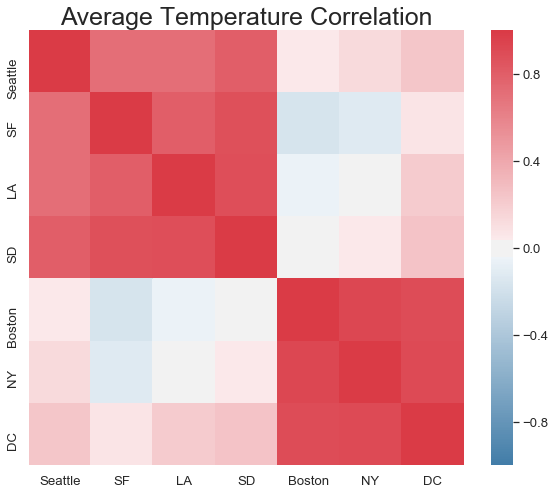

In [141]:
f, ax = plt.subplots(figsize=(10, 8))
plt.title("Average Temperature Correlation", fontsize = 25)

sns.set(font_scale=1.2)
corr = average_temp_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax , vmin=-1, vmax=1)
